In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
filenames = ['/data/detectors/2016-06-13_122141_sweep_stream.nc',
             '/data/detectors/2016-06-13_130543_sweep_stream.nc',
             '/data/detectors/2016-06-13_133949_sweep_stream.nc',
             '/data/detectors/2016-06-13_150939_sweep_stream.nc',
             '/data/detectors/2016-06-13_154201_sweep_stream.nc']

In [4]:
ncfs = [nc.NCFile(filename) for filename in filenames]

In [5]:
ss135 = [ncfs[0].read(name) for name in ncfs[0].node_names()]
ss200 = [ncfs[1].read(name) for name in ncfs[1].node_names()]
ss250 = [ncfs[2].read(name) for name in ncfs[2].node_names()]
ss225 = [ncfs[3].read(name) for name in ncfs[3].node_names()] + [ncfs[4].read(name) for name in ncfs[4].node_names()]

In [17]:
ss_all_temperature = [ss135, ss200, ss225, ss250]

In [36]:
ss135[0].state

StateDict({u'canceling_magnet': StateDict({u'distance_from_base_mm': 21, u'orientation': u'up'}), u'signal_conditioner': StateDict({u'adc_chain_gain': 0.0, u'description': u'Mark II 0.5-4 GHz', u'dac_chain_gain': -39}), u'temperature': StateDict({u'package': 0.14776356124402446})})

In [37]:
T_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=ss135[0].state.temperature.package,
                                                             vmax=ss250[0].state.temperature.package),
                                   cmap=plt.cm.coolwarm)

In [6]:
plt.rcParams['font.size'] = 7
plt.rcParams['figure.subplot.hspace'] = 0.3
plt.rcParams['figure.subplot.wspace'] = 0.3

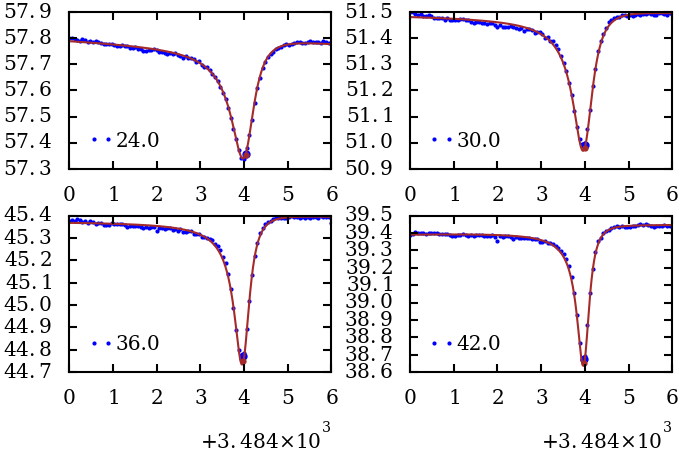

In [7]:
fig, axes = plt.subplots(2, 2)

for s, ax in zip(ss135, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

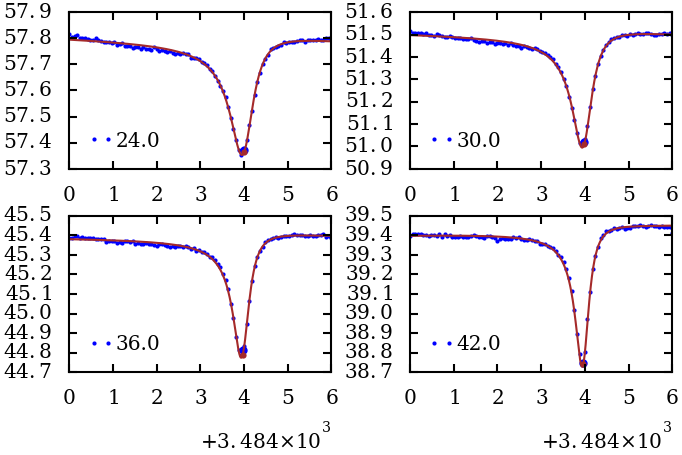

In [8]:
fig, axes = plt.subplots(2, 2)

for s, ax in zip(ss200, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

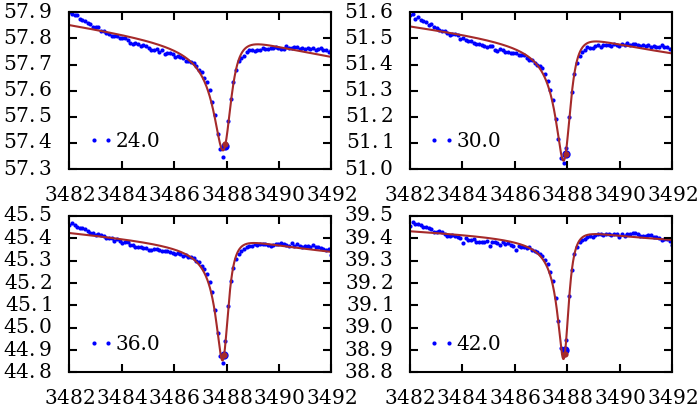

In [9]:
fig, axes = plt.subplots(2, 2)

for s, ax in zip(ss250, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

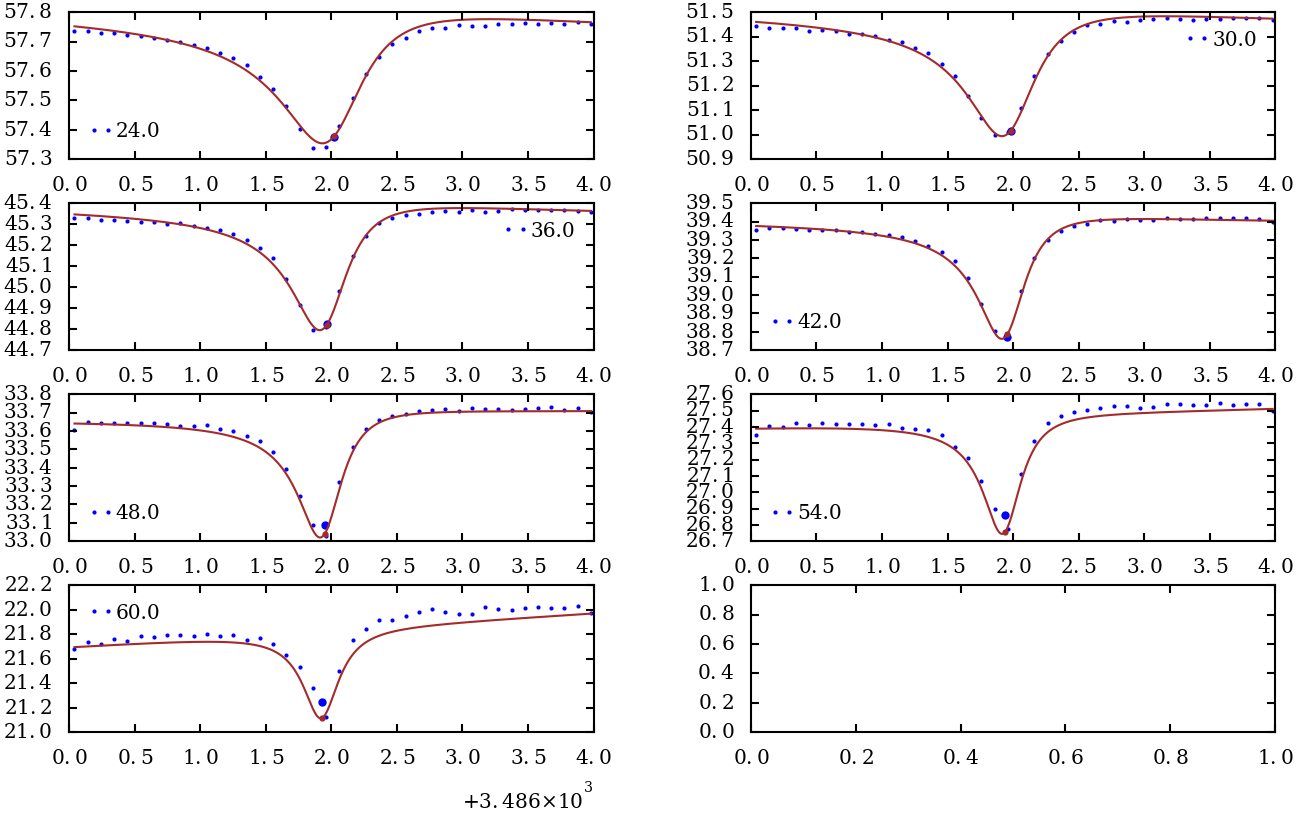

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(6, 4))

for s, ax in zip(ss225, axes.flatten()):
    f_scale = 1e-6
    f_mask = (3486e6 < s.sweep.frequency) & (s.sweep.frequency < 3490e6)
    f_min = s.sweep.frequency[f_mask].min()
    f_max = s.sweep.frequency[f_mask].max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency[f_mask], 20 * np.log10(np.abs(s.sweep.s21_point[f_mask])), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

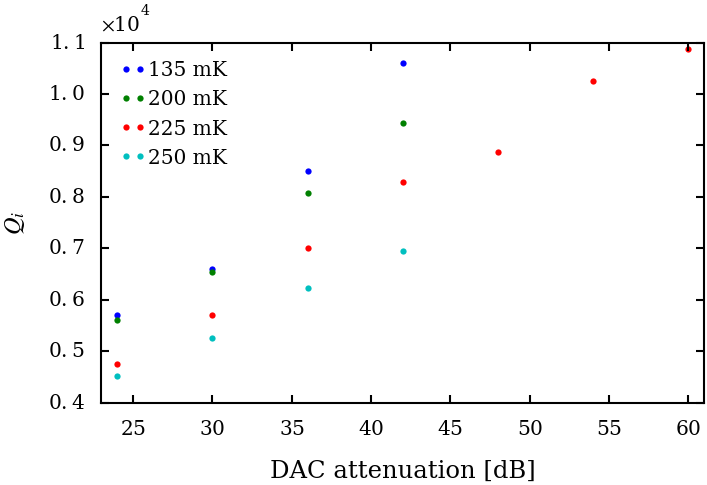

In [11]:
fig, ax = plt.subplots()

ax.plot([s.stream.roach_state.dac_attenuation for s in ss135],
        [s.resonator.Q_i for s in ss135], '.', label='135 mK')
ax.plot([s.stream.roach_state.dac_attenuation for s in ss200],
        [s.resonator.Q_i for s in ss200], '.', label='200 mK')
ax.plot([s.stream.roach_state.dac_attenuation for s in ss225],
        [s.resonator.Q_i for s in ss225], '.', label='225 mK')
ax.plot([s.stream.roach_state.dac_attenuation for s in ss250],
        [s.resonator.Q_i for s in ss250], '.', label='250 mK')


ax.set_xlim(23, 61)
ax.legend(loc='best')
ax.set_xlabel('DAC attenuation [dB]')
ax.set_ylabel('$Q_i$')

fig.savefig('/home/flanigan/temp/best_Qi_vs_dac_attenuation_temperature_steps.pdf')

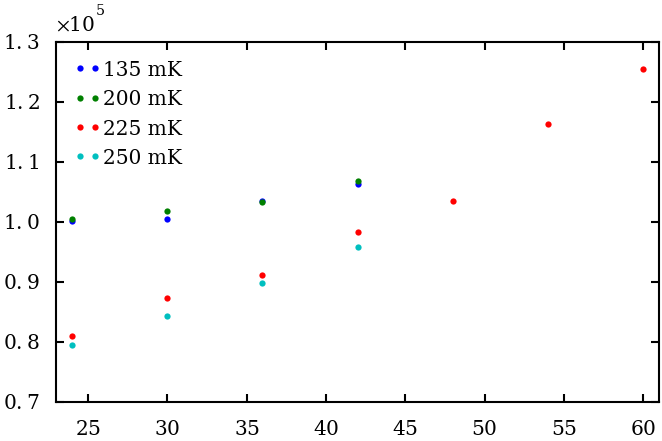

In [12]:
fig, ax = plt.subplots()

ax.plot([s.stream.roach_state.dac_attenuation for s in ss135],
        [s.resonator.Q_e_real for s in ss135], '.', label='135 mK')
ax.plot([s.stream.roach_state.dac_attenuation for s in ss200],
        [s.resonator.Q_e_real for s in ss200], '.', label='200 mK')
ax.plot([s.stream.roach_state.dac_attenuation for s in ss225],
        [s.resonator.Q_e_real for s in ss225], '.', label='225 mK')
ax.plot([s.stream.roach_state.dac_attenuation for s in ss250],
        [s.resonator.Q_e_real for s in ss250], '.', label='250 mK')

ax.set_xlim(23, 61)
ax.legend(loc='best')

In [13]:
[s.stream.roach_state.dac_attenuation for s in ss135]

[24.0, 30.0, 36.0, 42.0]

In [14]:
[s.resonator.Q_i for s in ss135]

[5701.9576558723102,
 6601.2945039864944,
 8505.9464051914674,
 10600.624363607656]

In [15]:
[s.resonator.Q_e_real for s in ss135]

[100173.0281391765, 100564.77418568193, 103607.263461653, 106324.09479058193]

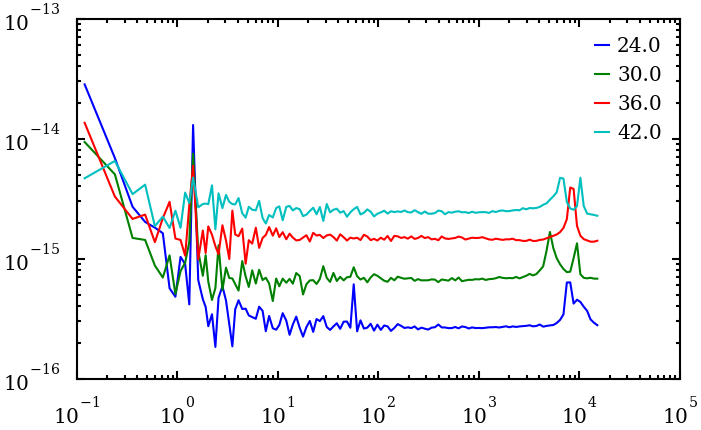

In [16]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

for s in ss135:
    ax.plot(s.S_frequency, s.S_xx, label=str(s.stream.roach_state.dac_attenuation))
ax.legend(loc='best');

# Constant readout power

In [26]:
ss_constant = [ss[1] for ss in ss_all_temperature]

In [22]:
x_color = 'blue'
q_color = 'brown'
x_scale = 1e6
q_scale = 1e6

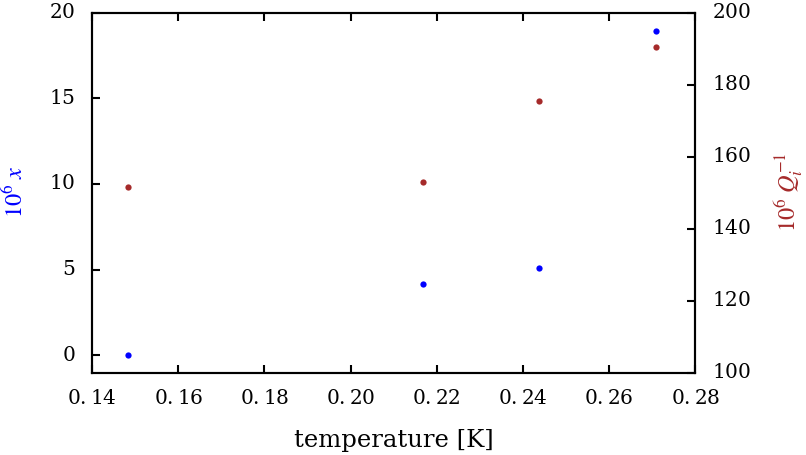

In [43]:
fig, x_ax = plt.subplots()
q_ax = x_ax.twinx()
x_ax.set_xlabel('temperature [K]')
x_ax.set_ylabel('$10^6 \; x$', color=x_color)
q_ax.set_ylabel('$10^6 \; Q_i^{-1}$', color=q_color)

for s in ss_constant:
    x_ax.plot(s.state.temperature.package,
              x_scale * (ss_constant[0].resonator.f_0 / s.resonator.f_0 - 1),
              '.', color=x_color)
    q_ax.plot(s.state.temperature.package,
              q_scale / s.resonator.Q_i,
              '.', color=q_color)

x_ax.set_ylim(-1, 20)
q_ax.set_ylim(100, 200);
fig.savefig('/home/flanigan/temp/x_and_iQi_vs_temperature.pdf', bbox_inches='tight')

In [38]:
f_scale = 1e-9

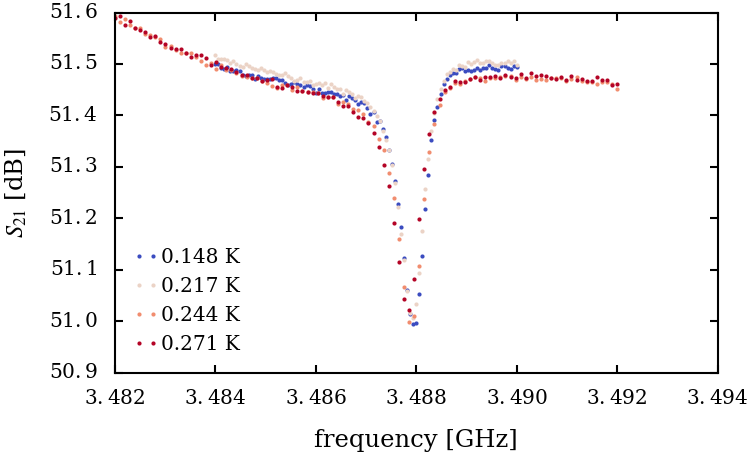

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('$S_{21}$ [dB]')

for s in ss_constant:
    ax.plot(f_scale * s.sweep.frequency,
            20 * np.log10(np.abs(s.sweep.s21_point)),
            '.', markersize=2, color=T_mappable.to_rgba(s.state.temperature.package),
            label='{:.3f} K'.format(s.state.temperature.package))

ax.legend(loc='best', fontsize='x-small')
fig.savefig('/home/flanigan/temp/S21_vs_frequency_temperature_steps.pdf', bbox_inches='tight')